In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

import numpy as np

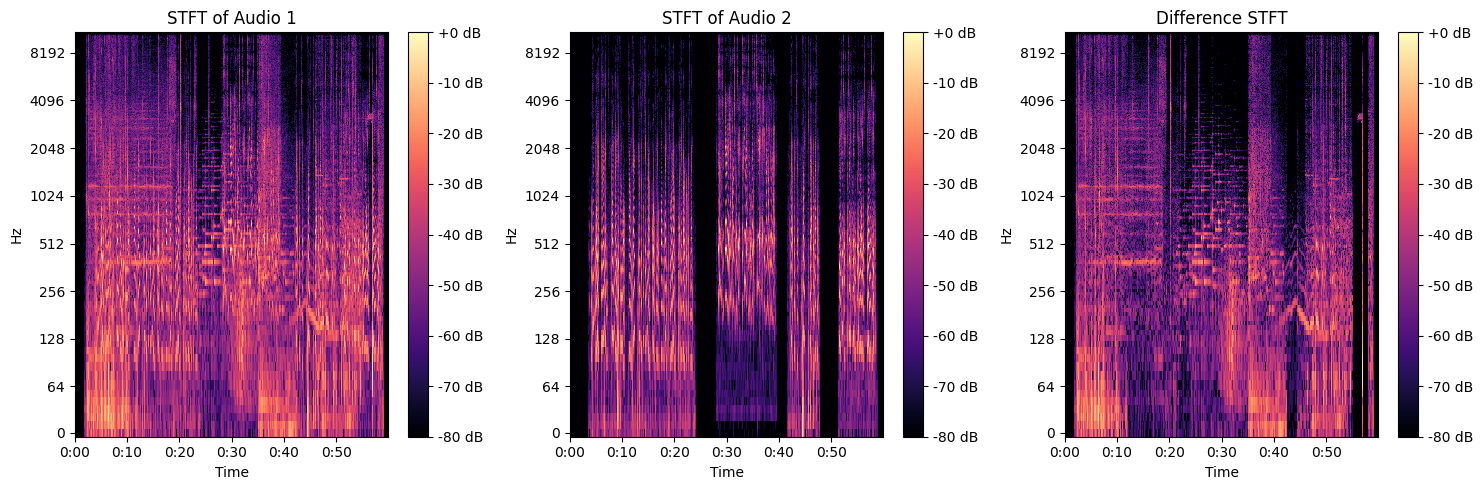

In [4]:
def process_audio(file1, file2):
  """Loads two audio files, calculates their STFTs, subtracts the difference, and displays the results."""

  try:
    # Load audio files
    y1, sr1 = librosa.load(file1)
    y2, sr2 = librosa.load(file2)

    # Check if sample rates are the same
    if sr1 != sr2:
      print("Warning: Sample rates of the two audio files are different. Resampling to the first file's sample rate.")
      y2 = librosa.resample(y2, orig_sr=sr2, target_sr=sr1)
      sr2 = sr1


    # Calculate STFTs
    stft1 = np.abs(librosa.stft(y1))
    stft2 = np.abs(librosa.stft(y2))

    # Subtract the difference (handle potential shape mismatch)
    min_shape = min(stft1.shape[1], stft2.shape[1])
    diff_stft = stft1[:, :min_shape] - stft2[:, :min_shape]

    # Plotting
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    librosa.display.specshow(librosa.amplitude_to_db(stft1, ref=np.max), sr=sr1, y_axis='log', x_axis='time')
    plt.title('STFT of Audio 1')
    plt.colorbar(format='%+2.0f dB')

    plt.subplot(1, 3, 2)
    librosa.display.specshow(librosa.amplitude_to_db(stft2, ref=np.max), sr=sr2, y_axis='log', x_axis='time')
    plt.title('STFT of Audio 2')
    plt.colorbar(format='%+2.0f dB')

    plt.subplot(1, 3, 3)
    librosa.display.specshow(librosa.amplitude_to_db(diff_stft, ref=np.max), sr=sr1, y_axis='log', x_axis='time')
    plt.title('Difference STFT')
    plt.colorbar(format='%+2.0f dB')


    plt.tight_layout()
    plt.show()

  except FileNotFoundError:
    print("Error: One or both audio files not found.")
  except Exception as e:
    print(f"An error occurred: {e}")


# Example usage: Replace 'audio1.wav' and 'audio2.wav' with your file paths.
top_dir = "46841"
process_audio(f"/Users/etemesi/PycharmProjects/Spite/data/dnr_v2/{top_dir}/mix.wav", f"/Users/etemesi/PycharmProjects/Spite/data/dnr_v2/{top_dir}/speech.wav")